In [8]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor 
import matplotlib.pyplot as plt
import os.path
from os import path
from sklearn.neural_network import MLPRegressor
import seaborn as sns
from scipy.stats import pearsonr

In [13]:
def LoadRawVariables():
    c2pt = []
    ts   = []
    taus = []
    xs   = []
    ys   = []
    zs   = []
    c3pt_S = []
    c3pt_V = []
    c3pt_A = []
    
    
    for tau in range(0, 49, 16):
        chunk_start = 0
        fname_c2pt_real = "../../Data/0.0042/GAUSS_n_2pt_mom_s" + str(tau) + "_up_real.cfg"
        fname_c2pt_imag = "../../Data/0.0042/GAUSS_n_2pt_mom_s" + str(tau) + "_up_imag.cfg"
        index = len(c2pt)
        if path.exists(fname_c2pt_real):
            with open(fname_c2pt_real) as fp:
                for i, line in enumerate(fp):
                    if i > chunk_start + 2 and (i % 166) != ((chunk_start + 2) % 166) and i < chunk_start + 2 + 166 * 64:
                        c2pt.append([float(line.rstrip())])
                        ts.append((i - 2) // 166)
                        taus.append(tau)
        if path.exists(fname_c2pt_imag):
            with open(fname_c2pt_imag) as fp:
                for i, line in enumerate(fp):
                    if i > chunk_start + 2 and (i % 166) != ((chunk_start + 2) % 166) and i < chunk_start + 2 + 166 * 64:
                        c2pt[index].append(float(line.rstrip()))
                        index += 1
        
        fname_c3pt_S_real = "../../Data/0.0042/PPAR_G0_n_3pt_mom_s" + str(tau) + "_up_real.cfg"
        fname_c3pt_S_imag = "../../Data/0.0042/PPAR_G0_n_3pt_mom_s" + str(tau) + "_up_imag.cfg"
        index = len(c3pt_S)
        if path.exists(fname_c3pt_S_real):
            with open(fname_c3pt_S_real) as fp:
                for i, line in enumerate(fp):
                    if i > chunk_start + 4 and (i % 166) != ((chunk_start + 4) % 166) and i < chunk_start + 4 + 166 * 64:
                        c3pt_S.append([float(line.rstrip())])
        if path.exists(fname_c3pt_S_imag):
            with open(fname_c3pt_S_imag) as fp:
                for i, line in enumerate(fp):
                    if i > chunk_start + 4 and (i % 166) != ((chunk_start + 4) % 166) and i < chunk_start + 4 + 166 * 64:
                        c3pt_S[index].append(float(line.rstrip()))
                        index += 1
        
        chunk_start = 170048
        fname_c3pt_V_real = "../../Data/0.0042/PPAR_G4_n_3pt_mom_s" + str(tau) + "_up_real.cfg"
        fname_c3pt_V_imag = "../../Data/0.0042/PPAR_G4_n_3pt_mom_s" + str(tau) + "_up_imag.cfg"
        index = len(c3pt_V)
        if path.exists(fname_c3pt_V_real):
            with open(fname_c3pt_V_real) as fp:
                for i, line in enumerate(fp):
                    if i > chunk_start + 4 and (i % 166) != ((chunk_start + 4) % 166) and i < chunk_start + 4 + 166 * 64:
                        c3pt_V.append([float(line.rstrip())])
        if path.exists(fname_c3pt_V_imag):
            with open(fname_c3pt_V_imag) as fp:
                for i, line in enumerate(fp):
                    if i > chunk_start + 4 and (i % 166) != ((chunk_start + 4) % 166) and i < chunk_start + 4 + 166 * 64:
                        c3pt_V[index].append(float(line.rstrip()))
                        index += 1
        
        chunk_start = 170048
        fname_c3pt_A_real = "../../Data/0.0042/PPAR_5Z_G5G3_n_3pt_mom_s" + str(tau) + "_up_real.cfg"
        fname_c3pt_A_imag = "../../Data/0.0042/PPAR_5Z_G5G3_n_3pt_mom_s" + str(tau) + "_up_imag.cfg"
        index = len(c3pt_A)
        if path.exists(fname_c3pt_A_real):
            with open(fname_c3pt_A_real) as fp:
                for i, line in enumerate(fp):
                    if i > chunk_start + 4 and (i % 166) != ((chunk_start + 4) % 166) and i < chunk_start + 4 + 166 * 64:
                        c3pt_A.append([float(line.rstrip())])
        if path.exists(fname_c3pt_A_imag):
            with open(fname_c3pt_A_imag) as fp:
                for i, line in enumerate(fp):
                    if i > chunk_start + 4 and (i % 166) != ((chunk_start + 4) % 166) and i < chunk_start + 4 + 166 * 64:
                        c3pt_A[index].append(float(line.rstrip()))
                        index += 1
                        

    return ts, taus, c2pt, c3pt_S, c3pt_V, c3pt_A

ts, taus, c2pt, c3pt_S, c3pt_V, c3pt_A = LoadRawVariables()

c2pt_factor_raw = sum(np.array(c2pt)) / len(c2pt)
N_factor = np.sqrt(c2pt_factor_raw[0] ** 2 + c2pt_factor_raw[1] ** 2)

for i in range(len(c2pt)):
    for j in range(2):
        c2pt[i][j] /= N_factor
        c3pt_S[i][j] /= N_factor
        c3pt_V[i][j] /= N_factor
        c3pt_A[i][j] /= N_factor

In [18]:
features = np.array([np.array([ts[i], taus[i], c2pt[i][0], c2pt[i][1]]) for i in range(len(ts))])
labels_S = np.array([np.array([c3pt_S[i][0], c3pt_S[i][1]]) for i in range(len(c3pt_S))])
labels_A = np.array([np.array([c3pt_A[i][0], c3pt_A[i][1]]) for i in range(len(c3pt_A))])
labels_V = np.array([np.array([c3pt_V[i][0], c3pt_V[i][1]]) for i in range(len(c3pt_V))])

In [24]:
corrs_S = []
corrs_A = []
corrs_V = []
for t in range(5, 14):
    c2pt_chunk = []
    c3pt_S_chunk = []
    c3pt_A_chunk = []
    c3pt_V_chunk = []
    for i in range(len(features)):
        if int(features[i, 0]) == t and int(features[i, 1]) == 0:
            c2pt_chunk.append(features[i, 2] + 1j * features[i, 3])
        if int(features[i, 0]) == 9 and int(features[i, 1]) == 0:
            c3pt_S_chunk.append(labels_S[i, 0] + 1j * labels_S[i, 1])
            c3pt_A_chunk.append(labels_A[i, 0] + 1j * labels_A[i, 1])
            c3pt_V_chunk.append(labels_V[i, 0] + 1j * labels_V[i, 1])
    c2pt_chunk = np.array(c2pt_chunk)
    c3pt_S_chunk = np.array(c3pt_S_chunk)
    c3pt_A_chunk = np.array(c3pt_A_chunk)
    c3pt_V_chunk = np.array(c3pt_V_chunk)
        
    corr_S, _ = pearsonr(c2pt_chunk, c3pt_S_chunk)
    corr_A, _ = pearsonr(c2pt_chunk, c3pt_A_chunk)
    corr_V, _ = pearsonr(c2pt_chunk, c3pt_V_chunk)
    corrs_S.append(np.sqrt(np.abs(corr_S)))
    corrs_A.append(np.sqrt(np.abs(corr_A)))
    corrs_V.append(np.sqrt(np.abs(corr_V)))

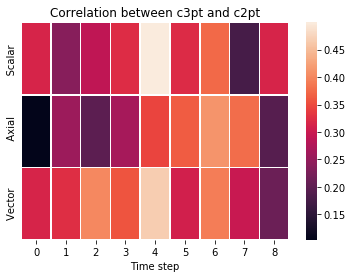

In [26]:
data = np.array([corrs_S, corrs_A, corrs_V])
ax = sns.heatmap(data, linewidth=0.5, yticklabels=False)
plt.ylabel("Vector               Axial             Scalar")
plt.title("Correlation between c3pt and c2pt")
plt.xlabel("Time step")
plt.show()